# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Data

In [2]:
data = pd.read_csv("C:\Saurabh\My phone\datasets\GRE admission/Admission_Predict.csv")

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

# inputs and targets

In [6]:
inputs = data.drop('Chance of Admit ', axis = 1)
targets = data['Chance of Admit ']

# feature selection

In [7]:
from sklearn.feature_selection import f_regression

In [8]:
f_regression(inputs, targets)

(array([7.14626250e-01, 7.20554243e+02, 6.67941156e+02, 4.07467332e+02,
        3.34443726e+02, 3.23996766e+02, 1.27873445e+03, 1.75513976e+02]),
 array([3.98420184e-001, 2.45811241e-091, 3.63410218e-087, 6.63501948e-063,
        1.14109467e-054, 2.00731452e-053, 2.33651400e-126, 1.91817338e-033]))

In [9]:
p_values = f_regression(inputs, targets)[1]

In [10]:
p_values.round(2)

array([0.4, 0. , 0. , 0. , 0. , 0. , 0. , 0. ])

In [11]:
inputs = inputs.drop('Serial No.', axis = 1)

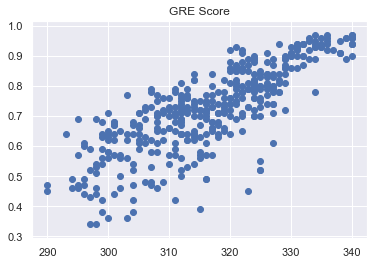

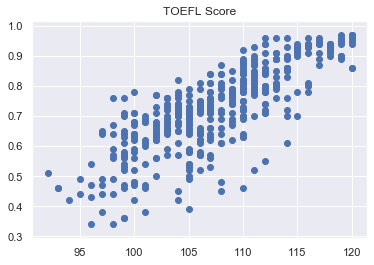

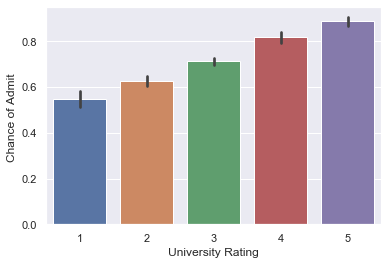

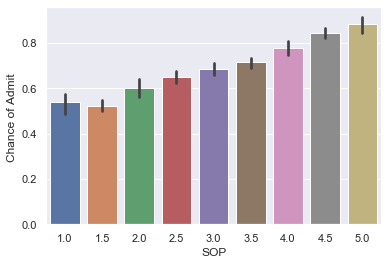

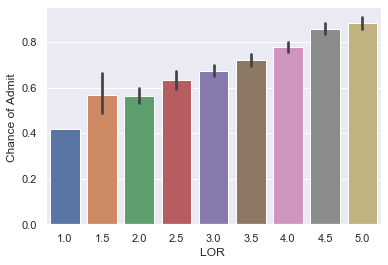

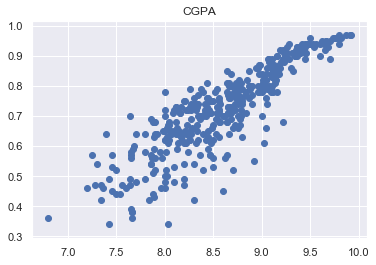

In [12]:
plt.title('GRE Score')
plt.scatter(data['GRE Score'],data['Chance of Admit '])
plt.show()

plt.title('TOEFL Score')
plt.scatter(data['TOEFL Score'],data['Chance of Admit '])
plt.show()


sns.barplot(data['University Rating'],data['Chance of Admit '])
plt.show()


sns.barplot(data['SOP'],data['Chance of Admit '])
plt.show()


sns.barplot(data['LOR '],data['Chance of Admit '])
plt.show()

plt.title('CGPA')
plt.scatter(data['CGPA'],data['Chance of Admit '])
plt.show()

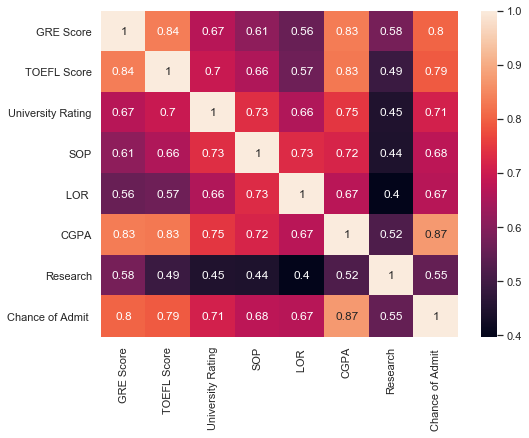

In [13]:
plt.figure(figsize = (8,6))
sns.heatmap(data.drop('Serial No.', axis = 1).corr(), annot = True)

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [15]:
variables = data[['GRE Score', 'TOEFL Score', 'CGPA']]

In [16]:
variables.head()

,GRE Score,TOEFL Score,CGPA
0,337,118,9.65
1,324,107,8.87
2,316,104,8.00
3,322,110,8.67
4,314,103,8.21


In [17]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [18]:
vif

,VIF,features
0,994.365812,GRE Score
1,1274.970487,TOEFL Score
2,714.459325,CGPA


As we can see variable 'TOEFL score' shows multicollinearity, So we'll drop it.

In [19]:
df = data.copy()
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [49]:
df1 = df.drop('TOEFL Score', axis = 1)

In [50]:
df1.head()

,Serial No.,GRE Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,4,4.5,4.5,9.65,1,0.92
1,2,324,4,4.0,4.5,8.87,1,0.76
2,3,316,3,3.0,3.5,8.00,1,0.72
3,4,322,3,3.5,2.5,8.67,1,0.80
4,5,314,2,2.0,3.0,8.21,0,0.65


In [51]:
df1.shape

(400, 8)

In [52]:
x = df1.drop(['Serial No.', 'Chance of Admit '], axis = 1)
y = df1['Chance of Admit ']

## train-test split

In [24]:
from sklearn.model_selection import train_test_split

In [126]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Classifiers

### Linear regression

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
reg = LinearRegression()

In [127]:
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [128]:
reg.score(x_train, y_train)

0.7876272890983982

In [129]:
reg.score(x_test, y_test)

0.8243888759425521

### Decision tree

In [31]:
from sklearn.tree import DecisionTreeRegressor

In [32]:
dec = DecisionTreeRegressor()

In [130]:
dec.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [131]:
dec.score(x_test, y_test)

0.6402667100341519

### Random forest

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
rnd = RandomForestRegressor()

In [132]:
rnd.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [133]:
rnd.score(x_test, y_test)

0.7904944240255871

### Checking which model is better with what parameters to obtain best results

In [39]:
from sklearn.model_selection import GridSearchCV

In [61]:
model_params = {
    'linear_reg' : {
        'model': LinearRegression(),
        'params': {
            'n_jobs': [None, 2,5]
        }
    },
    'decision_tree' : {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion' : ["mse", "friedman_mse", "mae"],
            'splitter' : ["best", "random"]
        }
    },
    'random_forest' : {
        'model': RandomForestRegressor(),
        'params': {
            'criterion':['mse', 'mae'],
            'n_estimators':[100,200,500]
        }
    }
}

In [62]:
score = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv = 5, return_train_score=False)
    clf.fit(x_train, y_train)
    score.append({
        'model': model_name,
        'best_params': clf.best_score_,
        'best_parms': clf.best_params_
    })

In [63]:
pd.DataFrame(score)

,model,best_params,best_parms
0,linear_reg,0.780244,{'n_jobs': None}
1,decision_tree,0.534969,"{'criterion': 'mse', 'splitter': 'random'}"
2,random_forest,0.745224,"{'criterion': 'mae', 'n_estimators': 100}"


In [134]:
y_pred_reg = reg.predict(x_test)

In [135]:
error = y_test - y_pred_reg

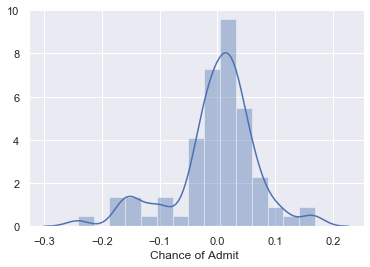

In [136]:
sns.distplot(error)

In [137]:
b = pd.DataFrame()

In [138]:
b['Actual values'] = y_test
b['Predicted values'] = y_pred_reg

In [139]:
b.head()

,Actual values,Predicted values
299,0.71,0.694779
367,0.57,0.517797
24,0.97,0.940193
226,0.63,0.674382
315,0.65,0.607652
